# <mark> SparkSession
    
Since Spark 2.0 SparkSession has become **an entry point to PySpark to work with RDD, and DataFrame**. Prior to 2.0, SparkContext used to be an entry point.
It is an entry point to underlying PySpark functionality in order to programmatically create PySpark RDD, DataFrame. **It’s object spark is default available in pyspark-shell** and it can be created programmatically using SparkSession.
    
an entry point to PySpark and creating a SparkSession instance would be the first statement you would write to program with RDD, DataFrame, and Dataset. SparkSession will be **created using SparkSession.builder builder patterns.**
    
With Spark 2.0 a **new class SparkSession (pyspark.sql import SparkSession)** has been introduced. SparkSession is **a combined class for all different contexts** we used to have prior to 2.0 release (SQLContext and HiveContext e.t.c). Since 2.0 SparkSession can be used in replace with SQLContext, HiveContext, and other contexts defined prior to 2.0. Though SparkContext used to be an entry point prior to 2.0, It is not completely replaced with SparkSession, many features of SparkContext are still available and used in Spark 2.0 and later. SparkSession also includes all the APIs available in different contexts –

    SparkContext,
    SQLContext,
    StreamingContext,
    HiveContext.
    
SparkSession **internally creates SparkConfig and SparkContext** with the configuration provided with SparkSession.
    
You can **create as many SparkSession as you want** in a PySpark application using either SparkSession.builder() or SparkSession.newSession(). Many Spark session objects are required when you wanted **to keep PySpark tables (relational entities) logically separated.**

#### <mark> SparkSession in PySpark shell
    
**By default PySpark shell provides “spark” object; which is an instance of SparkSession class in shell.** We can directly use this object where required in spark-shell. Start your “pyspark” shell from $SPARK_HOME\bin folder and enter the pyspark command.
    
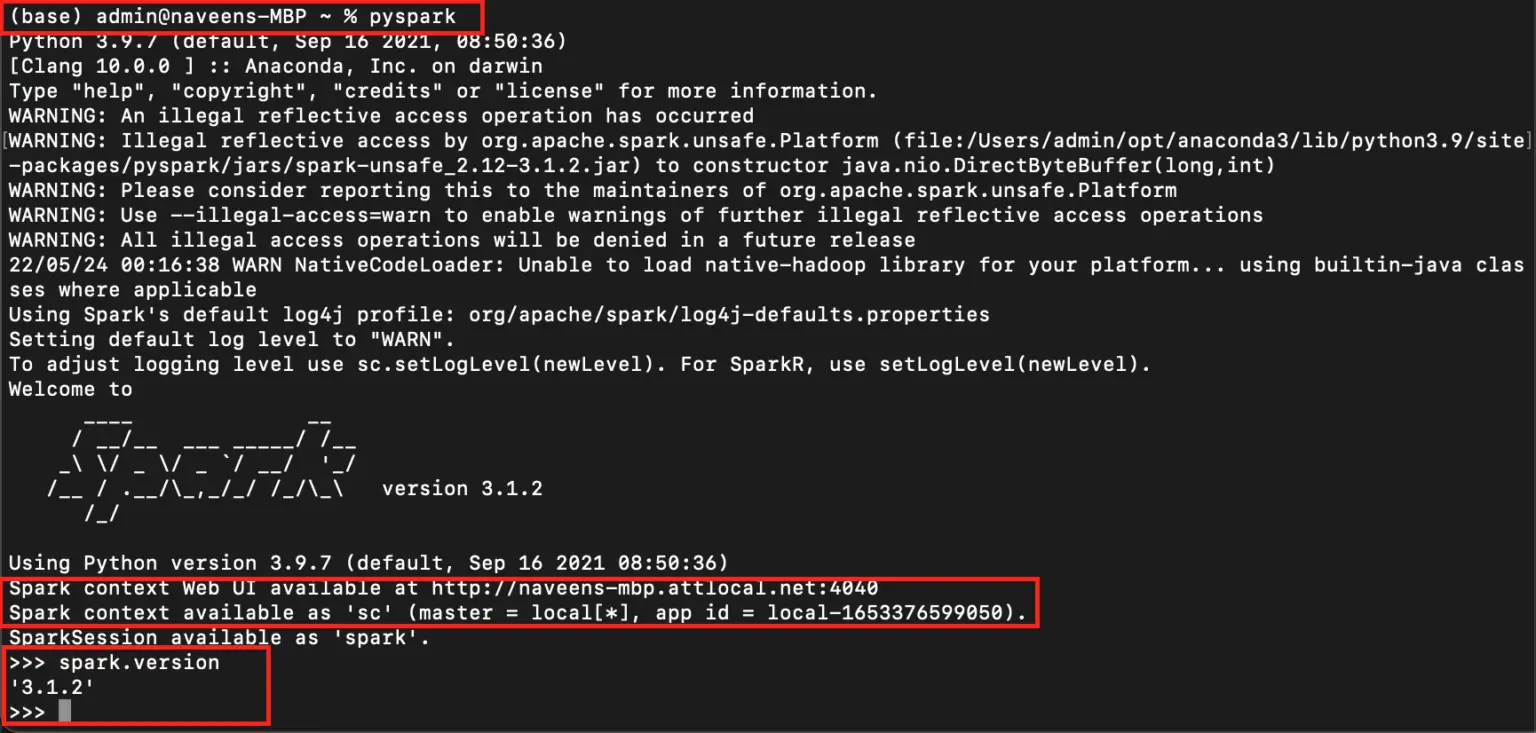
    
Similar to the PySpark shell, in most of the tools, the environment itself creates a default SparkSession object for us to use so you don’t have to worry about creating a SparkSession object.

<mark> Create SparkSession

In order to create SparkSession programmatically (in .py file) in PySpark, you need to use the builder pattern method **builder()** as explained below. 

    # Create SparkSession from builder
    import pyspark
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[1]") \
                        .appName('SparkByExamples.com') \
                        .getOrCreate()

**master()** – If you are running it on the cluster you need to use your master name as an argument to master(). usually, it would be either yarn or mesos depends on your cluster setup.

Use **local[x]** when running in Standalone mode. x should be an integer value and should be greater than 0; this represents how many partitions it should create when using RDD, DataFrame, and Dataset. Ideally, x value should be the number of CPU cores you have.
    
**appName()** – Used to set your application name.
    
**getOrCreate()** method returns an already existing SparkSession; if not exists, it creates a new SparkSession.

Create a new SparkSession using **newSession()** method. This uses the **same app name, master as the existing session. Underlying SparkContext will be the same for both sessions as you can have only one context per PySpark application.**

    # Create new SparkSession
    spark2 = SparkSession.newSession
    print(spark2)

Get Existing SparkSession
    
    spark3 = SparkSession.builder.getOrCreate
    print(spark3)
    
Once the SparkSession is created, you **can add the spark configs** during runtime or get all configs.

    # Set Config
    spark.conf.set("spark.executor.memory", "5g")
    
    # Get a Spark Config
    partitions = spark.conf.get("spark.sql.shuffle.partitions")
    print(partitions)


SparkSession also provides several methods to create a Spark DataFrame and DataSet. 

    # Create DataFrame
    df = spark.createDataFrame(
        [("Scala", 25000), ("Spark", 35000), ("PHP", 21000)])
    df.show()
    
Using SparkSession you can access PySpark/Spark SQL capabilities in PySpark. In order to use SQL features first, you need to create a temporary view in PySpark. Once you have a temporary view you can run any ANSI SQL queries using spark.sql() method. **PySpark SQL temporary views are session-scoped** and will not be available if the session that creates it terminates. If you want to have a temporary view that is shared among all sessions and keep alive until the Spark application terminates, you can create a **global temporary view using createGlobalTempView()**

    # Spark SQL
    df.createOrReplaceTempView("sample_table")
    df2 = spark.sql("SELECT _1,_2 FROM sample_table")
    df2.show()

Create Hive Table

SparkSession is used to create and query Hive tables. Note that in order to do this for testing you don’t need Hive to be installed. **saveAsTable() creates Hive managed table. Query the table using spark.sql().**

    # Create Hive table & query it.  
    spark.table("sample_table").write.saveAsTable("sample_hive_table")
    df3 = spark.sql("SELECT _1,_2 FROM sample_hive_table")
    df3.show()

**Spark table is considered a temporary table and Hive table as managed table.

Catalogs

To get the catalog metadata, PySpark Session exposes catalog variable. Note that these methods **spark.catalog.listDatabases** and **spark.catalog.listTables and returns the DataSet.**

    # Get metadata from the Catalog
    # List databases
    dbs = spark.catalog.listDatabases()
    print(dbs)

    # Output
    #[Database(name='default', description='default database', 
    #locationUri='file:/Users/admin/.spyder-py3/spark-warehouse')]

    # List Tables
    tbls = spark.catalog.listTables()
    print(tbls)

    #Output
    #[Table(name='sample_hive_table', database='default', description=None, tableType='MANAGED', #isTemporary=False), Table(name='sample_hive_table1', database='default', description=None, #tableType='MANAGED', isTemporary=False), Table(name='sample_hive_table121', database='default', #description=None, tableType='MANAGED', isTemporary=False), Table(name='sample_table', database=None, #description=None, tableType='TEMPORARY', isTemporary=True)]


##### <mark> SparkSession Commonly Used Methods

    version() – Returns the Spark version where your application is running, probably the Spark version your cluster is configured with.
    
    createDataFrame() – This creates a DataFrame from a collection and an RDD
    
    getActiveSession() – returns an active Spark session.
    
    read() – Returns an instance of DataFrameReader class, this is used to read records from csv, parquet, avro, and more file formats into DataFrame.
    
    readStream() – Returns an instance of DataStreamReader class, this is used to read streaming data.
    
    sparkContext()
    
    sql() – Returns a DataFrame after executing the SQL mentioned.
    
    sqlContext()
    
    stop() – Stop the current SparkContext.
    
    table() – Returns a DataFrame of a table or view.
    
    udf() – Creates a PySpark UDF to use it on DataFrame, Dataset, and SQL.

# <mark> Spark Context

SparkContext is an **entry point to the PySpark execution engine which communicates with the cluster.**

pyspark.SparkContext is **an entry point to the PySpark functionality** that is used **to communicate with the cluster and to create an RDD, accumulator,** and broadcast variables.

You can create **only one SparkContext per JVM,** in order to create another first you need to **stop the existing one using stop()**

The **Spark driver program creates and uses SparkContext to connect to the cluster manager to submit PySpark jobs**, and know what resource manager (YARN, Mesos, or Standalone) to communicate to. It is the heart of the PySpark application.
    
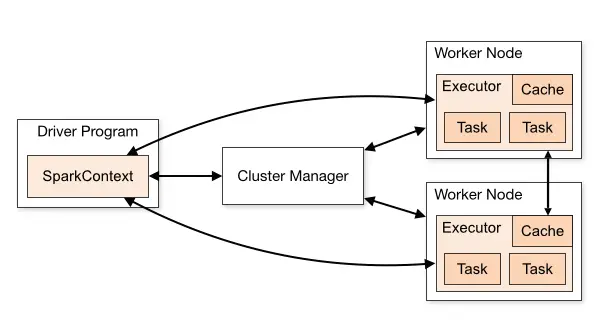

### SparkContext in PySpark shell

Be default PySpark shell creates and provides sc object, which is an instance of SparkContext class. We can directly use this object where required without the need of creating.

$ sc.appName

Similar to the PySpark shell, in most of the tools, notebooks, and Azure Databricks, the environment itself creates a default SparkContext object for us to use

### Creating SparkContext

Since PySpark 2.0, Creating a SparkSession creates a SparkContext internally and exposes the sparkContext variable to use. At any given time only one SparkContext instance should be active per JVM. In case you want to create another you should stop existing SparkContext using stop() before creating a new one.
    
    # Create SparkSession from builder which gives SparkContext instance
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[1]") \
                        .appName('SparkByExamples.com') \
                        .getOrCreate()
    print(spark.sparkContext)
    print("Spark App Name : "+ spark.sparkContext.appName)

We can create any number of SparkSession objects however, for all those objects underlying there will be only one SparkContext.

    # SparkContext stop() method
    spark.sparkContext.stop()
it logs the message INFO SparkContext: Successfully stopped SparkContext to console or to a log file.

    # Create RDD
    rdd = spark.sparkContext.range(1, 5)
    print(rdd.collect())
Once you have a SparkContext object, you can create a PySpark RDD in several ways



<mark> SparkContext Commonly Used Variables and Methods

    applicationId – Returns a unique ID of a PySpark application.
    
    version – Version of PySpark cluster where your job is running.
    
    uiWebUrl – Provides the Spark Web UI url that started by SparkContext.
    
    accumulator(value[, accum_param]) – It creates an pyspark accumulator variable with initial specified value. Only a driver can access accumulator variables.
    
    broadcast(value) – read-only PySpark broadcast variable. This will be broadcast to the entire cluster. You can broadcast a variable to a PySpark cluster only once.

    emptyRDD() – Creates an empty RDD

    getOrCreate() – Creates or returns a SparkContext

    hadoopFile() – Returns an RDD of a Hadoop file

    newAPIHadoopFile() – Creates an RDD for a Hadoop file with a new API InputFormat.

    sequenceFile() – Get an RDD for a Hadoop SequenceFile with given key and value types.

    setLogLevel() – Change log level to debug, info, warn, fatal, and error

    textFile() – Reads a text file from HDFS, local or any Hadoop supported file systems and returns an RDD

    union() – Union two RDDs

    wholeTextFiles() – Reads a text file in the folder from HDFS, local or any Hadoop supported file systems and returns an RDD of Tuple2. The first element of the tuple consists file name and the second element consists context of the text file.

# <mark> SparkContext vs SparkSession

#### SPARK CONTEXT          ||        SPARK SESSION

    since 1.x || introduced in version 2.0
    
    entry point to pyspark execution engine, communicates to cluster || entry point to pyspark application
    
    programmatically create Spark RDD, accumulators and broadcast variables on the cluster || programmatically create Spark RDD, DataFrame and DataSet.
    
    most functionalities available in Session || has many functionalities from SQL Context, hive Context, etc
    
    default object in shell- sc || spark